In [4]:
import tensorflow as tf

In [5]:
import keras

In [6]:
from keras.datasets import fashion_mnist, mnist

In [14]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

### Plotting data

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

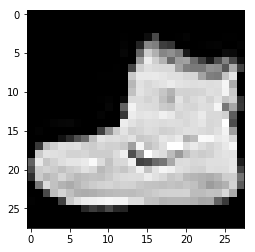

In [21]:
plt.imshow(trainX[0],cmap='gray')

In [25]:
trainX.shape

(60000, 28, 28)

### Scaling Data

In [28]:
trainX = trainX/255
testX = testX/255

### Target to one-hot-vector

In [32]:
from keras.utils import to_categorical

In [34]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

### Building Neural Network Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(700, input_dim=784, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(10,  activation='softmax'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 700)               549500    
_________________________________________________________________
dense_8 (Dense)              (None, 350)               245350    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3510      
Total params: 798,360
Trainable params: 798,360
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
trainX.reshape(-1,784).shape

(60000, 784)

In [48]:
model.fit(trainX.reshape(-1,784), trainY, batch_size=256, epochs=100, validation_split=.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
 - 4s - loss: 1.2353 - acc: 0.6463 - val_loss: 0.8289 - val_acc: 0.7390
Epoch 2/100
 - 4s - loss: 0.7489 - acc: 0.7640 - val_loss: 0.6675 - val_acc: 0.7818
Epoch 3/100
 - 4s - loss: 0.6415 - acc: 0.7952 - val_loss: 0.5987 - val_acc: 0.8025
Epoch 4/100
 - 4s - loss: 0.5858 - acc: 0.8104 - val_loss: 0.5610 - val_acc: 0.8125
Epoch 5/100
 - 4s - loss: 0.5498 - acc: 0.8189 - val_loss: 0.5297 - val_acc: 0.8212
Epoch 6/100
 - 4s - loss: 0.5250 - acc: 0.8257 - val_loss: 0.5097 - val_acc: 0.8265
Epoch 7/100
 - 4s - loss: 0.5059 - acc: 0.8304 - val_loss: 0.5028 - val_acc: 0.8263
Epoch 8/100
 - 4s - loss: 0.4912 - acc: 0.8349 - val_loss: 0.4832 - val_acc: 0.8322
Epoch 9/100
 - 4s - loss: 0.4776 - acc: 0.8382 - val_loss: 0.4835 - val_acc: 0.8293
Epoch 10/100
 - 4s - loss: 0.4681 - acc: 0.8414 - val_loss: 0.4637 - val_acc: 0.8365
Epoch 11/100
 - 4s - loss: 0.4580 - acc: 0.8436 - val_loss: 0.4532 - val_acc: 0.8398
Epoch 12/100
 - 4s - loss

In [49]:
model.fit(trainX.reshape(-1,784), trainY, batch_size=256, epochs=100, validation_split=.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
 - 4s - loss: 0.2723 - acc: 0.9058 - val_loss: 0.3333 - val_acc: 0.8813
Epoch 2/100
 - 4s - loss: 0.2721 - acc: 0.9048 - val_loss: 0.3305 - val_acc: 0.8817
Epoch 3/100
 - 4s - loss: 0.2708 - acc: 0.9048 - val_loss: 0.3365 - val_acc: 0.8780
Epoch 4/100
 - 4s - loss: 0.2697 - acc: 0.9059 - val_loss: 0.3280 - val_acc: 0.8815
Epoch 5/100
 - 4s - loss: 0.2687 - acc: 0.9052 - val_loss: 0.3258 - val_acc: 0.8832
Epoch 6/100
 - 4s - loss: 0.2675 - acc: 0.9066 - val_loss: 0.3244 - val_acc: 0.8828
Epoch 7/100
 - 4s - loss: 0.2680 - acc: 0.9059 - val_loss: 0.3271 - val_acc: 0.8813
Epoch 8/100
 - 4s - loss: 0.2668 - acc: 0.9067 - val_loss: 0.3283 - val_acc: 0.8823
Epoch 9/100
 - 4s - loss: 0.2666 - acc: 0.9060 - val_loss: 0.3298 - val_acc: 0.8800
Epoch 10/100
 - 4s - loss: 0.2660 - acc: 0.9063 - val_loss: 0.3265 - val_acc: 0.8825
Epoch 11/100
 - 4s - loss: 0.2625 - acc: 0.9074 - val_loss: 0.3239 - val_acc: 0.8837
Epoch 12/100
 - 4s - loss

In [50]:
model.save('fashion_mnist.hdf5')

In [59]:
pred = model.predict_classes(testX.reshape(-1,784))

In [67]:
y_true

(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([9, 2, 1, ..., 8, 1, 5], dtype=int64))

In [58]:
import numpy as np
y_true = np.where(testY)

In [60]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_pred=pred, y_true=y_true[1])

0.8865

In [69]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

C:\Workspace\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Workspace\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


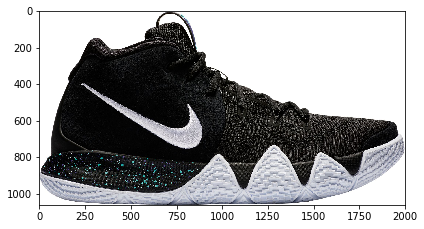

In [70]:
imshow('img.jpg')

In [71]:
img = imread('img.jpg')

In [74]:
img = resize(rgb2gray(img),(28,28))

C:\Workspace\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [75]:
img.shape

(28, 28)

In [76]:
#!wget https://s7d2.scene7.com/is/image/dkscdn/17NIKMKYR4BLKBL12PRF_Black_White_Blue_is

imshow(img)

In [83]:
np.argsort(model.predict(img.reshape(1,784)))

array([[4, 2, 3, 7, 1, 6, 9, 5, 0, 8]], dtype=int64)

In [84]:
from tensorflow import keras